# Домашняя работа №1
Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Жесткий срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде: <br\>
** [Майнор ИАД 2016] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

<hr\>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Регрессия с SVM (3 балла)

Неудивительно, что принципы SVM так же прекрасно ложатся на задачу регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [2]:
titanium = pd.read_csv("titanium.csv")
titan_data = titanium.x
titan_target = titanium.y
titanium

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652
5,635.0,0.639
6,645.0,0.646
7,655.0,0.657
8,665.0,0.652
9,675.0,0.655


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

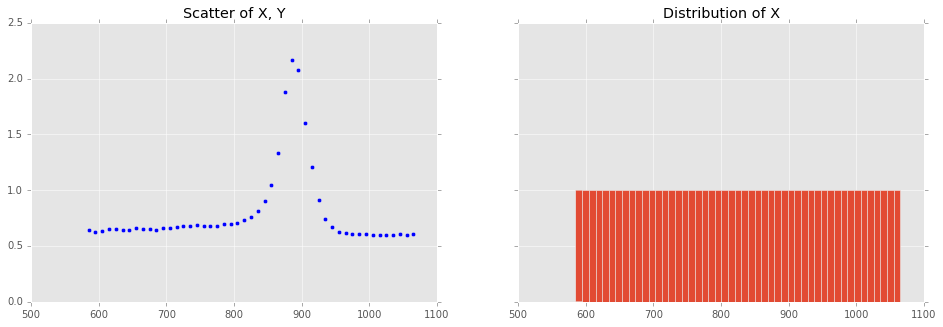

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 5))
ax1.scatter(titan_data, titan_target)
ax1.set_title("Scatter of X, Y")
ax2.hist(titan_data, bins = len(titan_data.unique()))
# unique() для совпадения кол-ва "корзин" и принимаемых значений
ax2.set_title("Distribution of X")

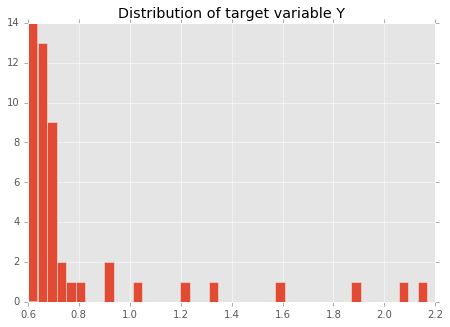

In [4]:
plt.figure(figsize=(7.3, 5))
plt.hist(titan_target, bins = len(titan_target.unique()))
plt.title("Distribution of target variable Y")

In [5]:
from sklearn.preprocessing import StandardScaler

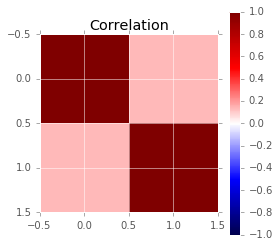

In [6]:
correlation_matrix = titanium.corr()
plt.figure(figsize = (4, 4))
plt.imshow(correlation_matrix, cmap='seismic', interpolation='nearest', vmin=-1, vmax=1, )
plt.colorbar()
plt.title("Correlation")
#на корреляцию не влияет масштаб

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [7]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [12]:
def train_SVR(data, target, kernel, gamma='auto', coef0=0.0, epsilon=0.01):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state = 42)
    
    #param_grid = {"C" : [.001, .01, .1, 1e0, 1e1, 1e2]}
    param_grid = {'kernel':('rbf','linear', 'sigmoid'), 'C':[1, 10,100,1000,10000],'gamma':[3, 6, 9]}
    
    svr_grid = GridSearchCV(SVR(), 
                            param_grid, cv = 3, verbose=5)
    
    svr_grid.fit(X_train, y_train)
    
    preds = svr_grid.best_estimator_.predict(data)
    
    print("MSE: ", mean_absolute_error(y_test, preds))
    plt.scatter(X_train, y_train, marker='o')
    plt.plot(data, preds, label=kernel)
    plt.legend()
    
    scores = [x[1] for x in svr_grid.grid_scores_]
    scores = np.array(scores).reshape(len(param_grid["C"]))
    
    plt.figure(figsize=(16, 9))
    plt.plot(scores)
    plt.xlabel('C')
    plt.ylabel('Score')
    plt.title("Score depending on C parameter with 3 folds")
    

In [9]:
titan_data = np.array(titan_data).reshape(-1,1)
titan_target = np.array(titan_target)
#train_SVR(titan_data, titan_target, 'linear')
#train_SVR(titan_data, titan_target, "poly", 6, 1)
#train_SVR(titan_data, titan_target, "rbf", 6, 1)

In [ ]:
train_SVR(titan_data, titan_target, "rbf", 6, 1)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] gamma=3, C=1, kernel=rbf ........................................
[CV] .............. gamma=3, C=1, kernel=rbf, score=-0.002509 -   0.2s
[CV] gamma=3, C=1, kernel=rbf ........................................
[CV] .............. gamma=3, C=1, kernel=rbf, score=-0.000011 -   0.0s
[CV] gamma=3, C=1, kernel=rbf ........................................
[CV] .............. gamma=3, C=1, kernel=rbf, score=-0.856599 -   0.0s
[CV] gamma=3, C=1, kernel=linear .....................................
[CV] ........... gamma=3, C=1, kernel=linear, score=-0.074438 -   0.8s
[CV] gamma=3, C=1, kernel=linear .....................................
[CV] ........... gamma=3, C=1, kernel=linear, score=-0.096255 -   0.5s
[CV] gamma=3, C=1, kernel=linear .....................................
[CV] ............ gamma=3, C=1, kernel=linear, score=0.004272 -   0.3s
[CV] gamma=3, C=1, kernel=sigmoid ....................................
[CV] ..........

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    3.6s


[CV] ........... gamma=9, C=1, kernel=linear, score=-0.074438 -   0.8s
[CV] gamma=9, C=1, kernel=linear .....................................
[CV] ........... gamma=9, C=1, kernel=linear, score=-0.096255 -   0.6s
[CV] gamma=9, C=1, kernel=linear .....................................
[CV] ............ gamma=9, C=1, kernel=linear, score=0.004272 -   0.3s
[CV] gamma=9, C=1, kernel=sigmoid ....................................
[CV] .......... gamma=9, C=1, kernel=sigmoid, score=-0.076682 -   0.0s
[CV] gamma=9, C=1, kernel=sigmoid ....................................
[CV] .......... gamma=9, C=1, kernel=sigmoid, score=-0.098035 -   0.0s
[CV] gamma=9, C=1, kernel=sigmoid ....................................
[CV] .......... gamma=9, C=1, kernel=sigmoid, score=-0.000301 -   0.0s
[CV] gamma=3, C=10, kernel=rbf .......................................
[CV] ............. gamma=3, C=10, kernel=rbf, score=-0.002509 -   0.0s
[CV] gamma=3, C=10, kernel=rbf .......................................
[CV] .

In [ ]:
len(param_grid["C"])

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левенштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [ ]:
# like this

df.head()

## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
RND_SEED = 


## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левенштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [ ]:
from sklearn.metrics import accuracy_score